# Model Analysis
using the data with only the significant features

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [58]:
df = pd.read_csv('data_signif.csv').drop('Unnamed: 0', axis=1)

### Features/Labels split

In [59]:
# Lables
y = df['target_return']

# Features
X = df.drop(['target_return'], axis=1)

### Rescaling features

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X_scaled = scaler.fit_transform(X)

In [63]:
X_standardize = pd.DataFrame(X_scaled,columns=X.columns)
X_standardize.head()

,exp_market_change,rates,Debt_M,Debt_Per_Capita,CPI_perc,GDP_Mill_dollars,GDP_Growth_perc,Unemployment_alt
0,-0.752487,1.614377,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
1,0.497042,0.922660,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
2,-0.240694,0.701310,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
3,2.370180,-0.363935,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
4,1.155783,-0.529947,0.357897,0.850759,-1.699192,1.431649,1.319792,-0.913907


### Train/Test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=101)

### Training

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [67]:
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.linear_model import LinearRegression

In [68]:
poly_features = PolynomialFeatures(include_bias=True)  
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
lm = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.001)
enet = ElasticNet(alpha=0.001,l1_ratio=0.6)


In [70]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_,enet.intercept_,poly_model.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso','ElasticNet','Polynomial'])

,Intercept
Linear,2.854212e-02
Ridge,2.502360e-02
Lasso,2.522622e-02
ElasticNet,2.514335e-02
Polynomial,-1.959411e+11


In [75]:
# Create dataframe for coefficents of linear model
lm_coef = pd.DataFrame(lm.coef_,index=X.columns,columns=['Linear'])

# Create dataframe for coefficents of ridge model
ridge_coef = pd.DataFrame(ridge.coef_,index=X.columns,columns=['Ridge'])

# Create dataframe for coefficents of lasso model
lasso_coef = pd.DataFrame(lasso.coef_,index=X.columns,columns=['Lasso'])

# Create dataframe for coefficents of ElasticNet model
enet_coef = pd.DataFrame(enet.coef_,index=X.columns,columns=['ElasticNet'])

# Put dataframes together
pd.concat([lm_coef, ridge_coef, lasso_coef,enet_coef], axis=1)

,Linear,Ridge,Lasso,ElasticNet
exp_market_change,-0.032147,-0.026801,-0.024900,-0.026058
rates,-0.110166,-0.048012,-0.036083,-0.039457
Debt_M,3.072819,0.008018,-0.017712,-0.001837
Debt_Per_Capita,-3.457955,-0.043383,-0.000000,-0.020268
CPI_perc,0.096454,0.021529,0.024228,0.025176
GDP_Mill_dollars,1.106572,0.034258,0.000000,0.006834
GDP_Growth_perc,0.302552,-0.027855,-0.000000,-0.000000
Unemployment_alt,0.044277,-0.008027,-0.003316,-0.003140


### Testing

In [76]:
from sklearn import metrics

In [77]:
# Get predictions for training data
fit_lm = lm.predict(X_train)
fit_ridge = ridge.predict(X_train)
fit_lasso = lasso.predict(X_train)
fit_enet = enet.predict(X_train)
fit_poly_model = poly_model.predict(X_poly_test)

# Print MSE for models
print('MSE (train)')
print('Linear:     ', metrics.mean_squared_error(y_train, fit_lm))
print('Ridge:      ', metrics.mean_squared_error(y_train, fit_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_train, fit_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_train, fit_enet))
print('Polynomial: ', metrics.mean_squared_error(y_train, fit_poly_model))

MSE (train)
Linear:      0.0141504263244
Ridge:       0.0149589653371
Lasso:       0.0150386098807
ElasticNet:  0.0150155065799


ValueError: Found input variables with inconsistent numbers of samples: [253, 109]

In [78]:
print('MSE (train)')
print('Linear:     ', lm.score(X_train, y_train))
print('Ridge:      ', ridge.score(X_train, y_train))
print('Lasso:      ', lasso.score(X_train, y_train))
print('ElasticNet: ', enet.score(X_train, y_train))
print('Polynomial: ', poly_model.score(X_poly, y_train))

MSE (train)
Linear:      0.129711967634
Ridge:       0.0799847148776
Lasso:       0.0750863682429
ElasticNet:  0.0765072813477
Polynomial:  0.216275460488


In [79]:
def adj_r2_score(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.coef_)-1)
    return adj

In [80]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_train, lm.predict(X_train)))
print('Ridge:      ', adj_r2_score(ridge, y_train, ridge.predict(X_train)))
print('Lasso:      ', adj_r2_score(lasso, y_train, lasso.predict(X_train)))
print('ElasticNet: ', adj_r2_score(enet, y_train, enet.predict(X_train)))
print('Polynomial: ', adj_r2_score(poly_model, y_train, poly_model.predict(X_poly)))

Adjusted R-SQUARED SCORES
Linear:      0.101177933786
Ridge:       0.0498202792999
Lasso:       0.0447613311361
ElasticNet:  0.0462288315558
Polynomial:  0.0459005605941


### Predicting

In [81]:
pred_lm = lm.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_enet = enet.predict(X_test)
pred_poly_model = poly_model.predict(X_poly_test)

### Testing

Firstly we plot the actual returns vs. the predictions by our models.

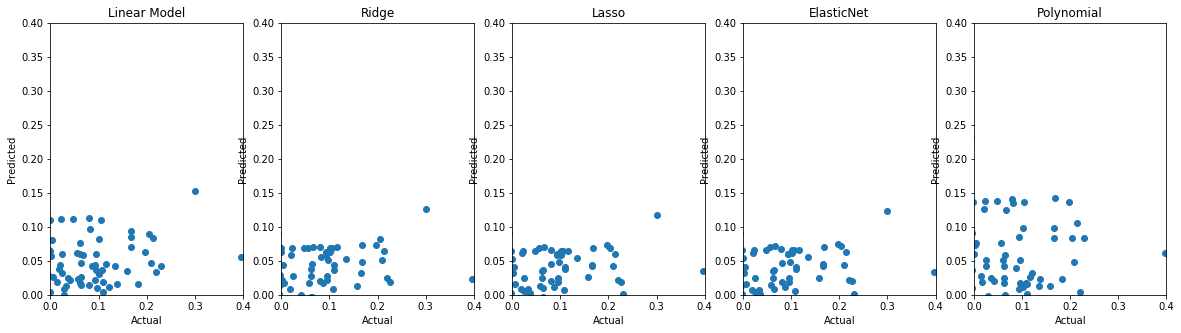

In [84]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=5)

# Create list of titles and predictions to use in for loop
pred = [pred_lm, pred_ridge, pred_lasso, pred_enet, pred_poly_model]
title = ['Linear Model', 'Ridge', 'Lasso', 'ElasticNet','Polynomial']

# Loop through all axes to plot each model's results 
for i in range(5):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 0.4)
    ax[i].set_ylim(0, 0.4)
    ax[i].scatter(y_test,pred[i]) 

Secondly we calculate the MSE for each model on our testing set. 

In [83]:
print('MSE:')
print('Linear:     ', metrics.mean_squared_error(y_test, pred_lm))
print('Ridge:      ', metrics.mean_squared_error(y_test, pred_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_test, pred_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_test, pred_enet))
print('Polynomial: ', metrics.mean_squared_error(y_test, pred_poly_model))

MSE:
Linear:      0.013642763897
Ridge:       0.0137450066885
Lasso:       0.013647294791
ElasticNet:  0.0136107473914
Polynomial:  0.0149141085889
